<a href="https://colab.research.google.com/github/DamodaraBarbosa/eleicoes_ceara_2022/blob/main/07_senador_analysis_eleicoes_ceara_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas geobr descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.1/928.1 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.2 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.1
    Uninstalling shapely-2.0.1:
      Successfully uninstalled shapely-2.0.1


Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geobr import read_municipality
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Para ignorar qualquer aviso:

import warnings

warnings.filterwarnings("ignore")

# 1. Carregamento dos dados no *dataframe*

In [ ]:
votacao_ce = pd.read_csv(
    '/content/drive/MyDrive/Datasets/votacao_secao_2022_CE_tratado.csv',
    encoding= 'latin-1', sep= ','
)

In [ ]:
votacao_ce.head()

,nm_municipio,nr_zona,nr_secao,ds_cargo,nr_votavel,nm_votavel,qt_votos
0,FORTALEZA,94,6,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,4
1,RUSSAS,9,266,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,13
2,PARAIPABA,109,119,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,3
3,ITAPIPOCA,17,25,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,2
4,SABOEIRO,43,228,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,4


# 2. Informações do *dataframe*

A base de dados utilizada nesta análise é a mesma feita em outras análises. Portanto, algumas informações do *dataframe* como as suas dimensões, os tipos de dado de cada coluna e a presença de dados duplicados e faltantes podem ser vistas no *notebook*: https://github.com/DamodaraBarbosa/eleicoes_ceara_2022/blob/main/05_data_analysis_eleicoes_ceara_2022.ipynb

# 3. Tratamento dos dados

Apesar de serem valores numéricos, os dados das colunas `nr_zona` e `nr_secao` são categóricos já que representam zonas e seções eleitorais. 

In [ ]:
# Conversão dos dados das colunas para tipo string:

votacao_ce['nr_zona'] = votacao_ce['nr_zona'].astype(str)
votacao_ce['nr_secao'] = votacao_ce['nr_secao'].astype(str)

In [ ]:
votacao_ce.dtypes

nm_municipio    object
nr_zona         object
nr_secao        object
ds_cargo        object
nr_votavel       int64
nm_votavel      object
qt_votos         int64
dtype: object

# 4. Análise eleitoral para cargo de senador do estado do Ceará

## 4.1 Candidatos

In [ ]:
# Buscam-se apenas os dados referentes ao cargo de senador:

senador = votacao_ce.query('ds_cargo == "SENADOR"')
senador.head()

,nm_municipio,nr_zona,nr_secao,ds_cargo,nr_votavel,nm_votavel,qt_votos
575,LIMOEIRO DO NORTE,29,109,SENADOR,95,VOTO BRANCO,7
576,CANINDÉ,33,488,SENADOR,95,VOTO BRANCO,14
577,SÃO LUÍS DO CURU,23,323,SENADOR,95,VOTO BRANCO,16
578,BARREIRA,52,142,SENADOR,95,VOTO BRANCO,12
579,CRATO,27,304,SENADOR,95,VOTO BRANCO,10


Ao buscar os dados únicos na coluna `nm_votavel` observa-se que:

In [ ]:
senador['nm_votavel'].unique()

array(['VOTO BRANCO', 'VOTO NULO', 'CAMILO SOBREIRA DE SANTANA',
       'FRANCISCO CARLOS ALVES DA SILVA', 'ERIKA GONÇALVES AMORIM',
       'KAMILA CARDOSO DE SOUZA RIBEIRO'], dtype=object)

Excetuando-se votos em branco e nulos, os candidados são: Camilo Santana, Fco Carlos Silva, Erika Gonçalves e Kamila Cardoso.

## 4.2 Votos por candidato

In [ ]:
# Os votos por senador são determinados e o dataframe é ordenado decrescentemente:

votos_por_senador = senador.groupby('nm_votavel')['qt_votos'].sum().to_frame().sort_values('qt_votos', ascending= False)
votos_por_senador

,qt_votos
nm_votavel,
CAMILO SOBREIRA DE SANTANA,3389513
KAMILA CARDOSO DE SOUZA RIBEIRO,1273272
VOTO NULO,451233
VOTO BRANCO,313270
ERIKA GONÇALVES AMORIM,193243
FRANCISCO CARLOS ALVES DA SILVA,2919


Os dados são mostrados no gráfico:

In [ ]:
fig = px.bar(
    data_frame= votos_por_senador,
    y= votos_por_senador.index,
    x= 'qt_votos', text= 'qt_votos',
    color= votos_por_senador.index,
    title= 'Votos nos candidatos ao cargo de senador do Ceará'
)
fig.update_xaxes(range= [0, 3.7e6])
fig.update_layout(title= dict(x= 0.5), yaxis_title= 'Candidatos', xaxis_title= 'Quantidade de votos', showlegend= False)
fig.update_traces(textfont_size= 12, textposition= 'outside')
fig.show()

## 4.3 Porcentagem dos votos totais e válidos ao senado

In [ ]:
# Excetuam-se os votos brancos e nulos:

votos_validos = senador.query('nm_votavel != ["VOTO NULO", "VOTO BRANCO"]')

# Calcula-se apenas os votos válidos:

total_votos_validos = votos_validos['qt_votos'].sum()
print(f'Votos válidos: {total_votos_validos}')

# Votos totais incluindo brancos e nulos:

total_votos = senador['qt_votos'].sum()
print(f'Votos totais: {total_votos}')

Votos válidos: 4858947
Votos totais: 5623450


Verifica-se que nem VOTO BRANCO, nem VOTO NULO estão mais presentes no conjunto de dados.

In [ ]:
votos_validos['nm_votavel'].unique()

array(['CAMILO SOBREIRA DE SANTANA', 'FRANCISCO CARLOS ALVES DA SILVA',
       'ERIKA GONÇALVES AMORIM', 'KAMILA CARDOSO DE SOUZA RIBEIRO'],
      dtype=object)

Um *dataframe* contendo as informações sobre porcentagens dos votos é instanciado:

In [ ]:
# Instancia-se um dataframe contendo a porcentagem de votos totais e votos válidos por candidato ao senado:

porcentagem_votos_senador = pd.DataFrame(
    {'Votos totais': round((senador.groupby('nm_votavel')['qt_votos'].sum()/total_votos) * 100, 2), # cálculo da porcentagem de votos totais.
     'Votos válidos': round((votos_validos.groupby('nm_votavel')['qt_votos'].sum()/total_votos_validos) * 100, 2)} # cálculo da porcentagem de votos válidos.
).sort_values(['Votos totais', 'Votos válidos'], ascending= [False, False]) # os dados são ordenados em ordem decrescente.

# Utiliza-se o método transpose para inverter index em colunas e vice-versa:

porcentagem_votos_senador = porcentagem_votos_senador.transpose()

porcentagem_votos_senador

nm_votavel,CAMILO SOBREIRA DE SANTANA,KAMILA CARDOSO DE SOUZA RIBEIRO,VOTO NULO,VOTO BRANCO,ERIKA GONÇALVES AMORIM,FRANCISCO CARLOS ALVES DA SILVA
Votos totais,60.27,22.64,8.02,5.57,3.44,0.05
Votos válidos,69.76,26.20,NaN,NaN,3.98,0.06


O resultado é mostrado abaixo:

In [ ]:
fig = px.bar(
    data_frame= porcentagem_votos_senador,
    y= porcentagem_votos_senador.index,
    x= porcentagem_votos_senador.columns,
    title= 'Porcentagem dos votos totais e válidos ao cargo de senador do Ceará'
)
fig.update_layout(
    yaxis= dict(autorange= 'reversed'), xaxis_title= 'Porcentagem dos votos', 
    yaxis_title= '', legend_title= 'Candidatos', title= dict(x= 0.5)
)
fig.show()

## 4.4 Votos por município cearense

In [ ]:
# Os votos nos cadidatos ao senado são determinados:

votos_candidatos_por_municipio = senador.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()

# Os dados são ordenados em ordem alfabética para os municípios e em ordem decrescente para os votos:

votos_candidatos_por_municipio = votos_candidatos_por_municipio.sort_values(['nm_municipio', 'qt_votos'], ascending= [True, False])

# Seleciona-se apenas o senador que obteve mais votos em cada município:

vencedores_por_municipio = votos_candidatos_por_municipio.groupby('nm_municipio').head(1)
vencedores_por_municipio.head() # para visualizar o dataframe.

,nm_municipio,nm_votavel,qt_votos
0,ABAIARA,CAMILO SOBREIRA DE SANTANA,4420
6,ACARAPE,CAMILO SOBREIRA DE SANTANA,5489
11,ACARAÚ,CAMILO SOBREIRA DE SANTANA,22540
17,ACOPIARA,CAMILO SOBREIRA DE SANTANA,19132
23,AIUABA,CAMILO SOBREIRA DE SANTANA,6970


Para visualização, utilizam-se os dados geoespaciais do estado do Ceará.

In [ ]:
# Dataframe com dados geoespaciais dos municípios cearenses:

ceara_gpd = read_municipality(code_muni= 23, year= 2020)

# Um pequeno tratamento é feito para que os nomes dos municípios estejam em caixa alta:

ceara_gpd['name_muni'] = ceara_gpd['name_muni'].str.upper()

ceara_gpd.head() # visualização do dataframe.

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,2300101.0,ABAIARA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ..."
1,2300150.0,ACARAPE,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ..."
2,2300200.0,ACARAÚ,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.30984 -2.80769, -40.26882 ..."
3,2300309.0,ACOPIARA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.15631 -5.95731, -39.15267 ..."
4,2300408.0,AIUABA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.11801 -6.34845, -40.11298 ..."


Os dados são cruzados:

In [ ]:
vencedores_por_municipio_gpd = pd.merge(
    left= ceara_gpd[['name_muni', 'geometry']], right= vencedores_por_municipio,
    how= 'left', left_on= 'name_muni', right_on= 'nm_municipio'
)
vencedores_por_municipio_gpd = vencedores_por_municipio_gpd.drop('name_muni', axis= 1) # a coluna é eliminada visto que possui dados redundantes.

In [ ]:
vencedores_por_municipio_gpd.head()

,geometry,nm_municipio,nm_votavel,qt_votos
0,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",ABAIARA,CAMILO SOBREIRA DE SANTANA,4420
1,"MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ...",ACARAPE,CAMILO SOBREIRA DE SANTANA,5489
2,"MULTIPOLYGON (((-40.30984 -2.80769, -40.26882 ...",ACARAÚ,CAMILO SOBREIRA DE SANTANA,22540
3,"MULTIPOLYGON (((-39.15631 -5.95731, -39.15267 ...",ACOPIARA,CAMILO SOBREIRA DE SANTANA,19132
4,"MULTIPOLYGON (((-40.11801 -6.34845, -40.11298 ...",AIUABA,CAMILO SOBREIRA DE SANTANA,6970


O resultado é mostrado no mapa abaixo:

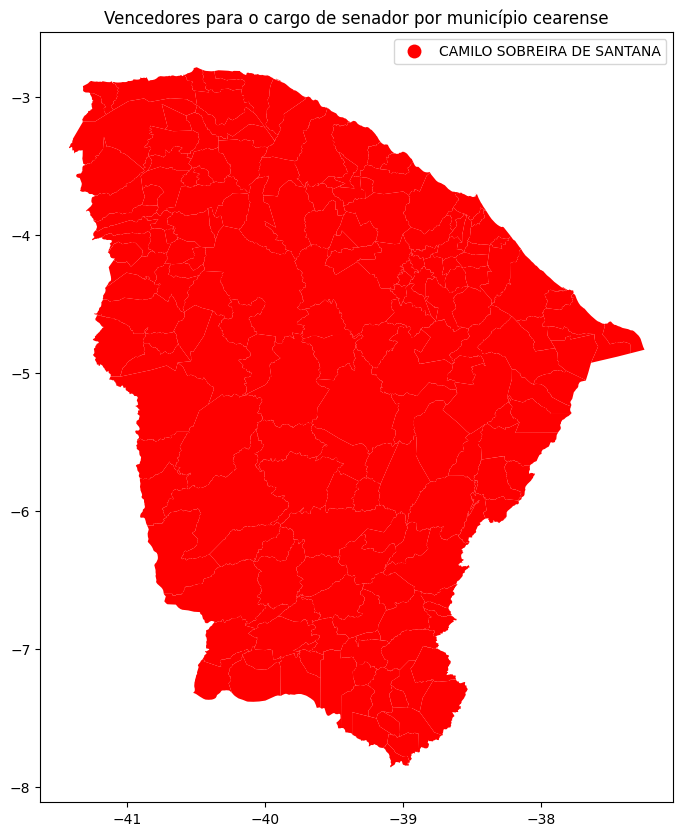

In [ ]:
ax = vencedores_por_municipio_gpd.plot(
    'nm_votavel', cmap= 'autumn', legend= True,
    legend_kwds= {'loc': 'upper right'},
    figsize= (12, 10)
)
ax.set_title('Vencedores para o cargo de senador por município cearense')
plt.show()

* O candidato eleito Camilo Santana obteve mais votos em todos os municípios cearenses.

## 4.5 Votos para senador nos municípios da Região Metropolitana de Fortaleza

A Região Metropolitana de Fortaleza é constituída de 19 municípios sendo eles:

* Aquiraz, Cascavel, Caucaia, Chorozinho, Eusébio, Fortaleza, Guaiúba, Horizonte, Itaitinga, Maracanaú, Maranguape, Pacajus, Pacatuba, Pindoretama, São Gonçalo do Amarante, São Luís do Curu, Paraipaba, Paracuru e Trairi. 

Fonte: https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_Fortaleza


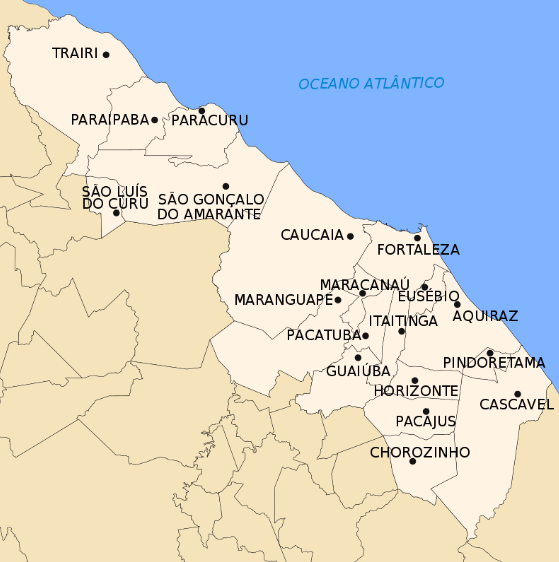

A lista abaixo contém o nome de todos os municípios, em caixa alta, que fazem parte da Região Metropolitana de Fortaleza:

In [ ]:
regiao_metropolitana = [
    'AQUIRAZ', 'CASCAVEL', 'CAUCAIA', 'CHOROZINHO', 'EUSÉBIO', 
    'FORTALEZA', 'GUAIÚBA', 'HORIZONTE', 'ITAITINGA', 'MARACANAÚ', 
    'MARANGUAPE', 'PACAJUS', 'PACATUBA', 'PINDORETAMA', 
    'SÃO GONÇALO DO AMARANTE', 'SÃO LUÍS DO CURU',
    'PARAIPABA', 'PARACURU', 'TRAIRI'
]

### 4.5.1 Porcentagem dos votos para o cargo de senador por município da Região Metropolitana de Fortaleza

In [ ]:
# Buscam-se no conjunto de dados ao cargo de senador apenas os municípios da Região Metropolitana de Fortaleza:

senador_regiao_metropolitana = senador.query('nm_municipio in @regiao_metropolitana')

# Agrupam-se os dados por município e candidato para determinar os votos:

vencedores_regiao_metropolitana = senador_regiao_metropolitana.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()

# Os dados são ordenados em ordem alfabética e em ordem decrescente do número de votos:

vencedores_regiao_metropolitana = vencedores_regiao_metropolitana.sort_values(['nm_municipio', 'qt_votos'], ascending= [True, False])

vencedores_regiao_metropolitana.head()

,nm_municipio,nm_votavel,qt_votos
0,AQUIRAZ,CAMILO SOBREIRA DE SANTANA,29895
3,AQUIRAZ,KAMILA CARDOSO DE SOUZA RIBEIRO,15239
5,AQUIRAZ,VOTO NULO,4330
4,AQUIRAZ,VOTO BRANCO,2900
1,AQUIRAZ,ERIKA GONÇALVES AMORIM,437


In [ ]:
# Instancia um dicionário contendo o nº de votos totais ao cargo de senador por município da Região Metropolitana de Fortaleza:

votos_regiao_metropolitana = senador.groupby('nm_municipio')['qt_votos'].sum()
votos_regiao_metropolitana = dict(votos_regiao_metropolitana)

In [ ]:
# Cálculo da porcentagem de votos que cada candidato ao senado obteve em cada município da Região Metropolitana de Fortaleza:
# Para isso define-se uma função para o cálculo.

def porcentagem_votos(dataframe: pd.DataFrame, dictionary: dict):

  percentual_de_votos = list()

  for index, row in dataframe.iterrows(): # itera-se o dataframe para obter cada linha dele.
    porcentagem = round((row['qt_votos']/dictionary[row['nm_municipio']]) * 100, 2) # os votos são divididos pelo total de votos por município.
    percentual_de_votos.append(porcentagem) # o valor calculado é adicionado a lista.

  return percentual_de_votos

In [ ]:
# A coluna com porcentagem de votos é adicionada ao dataframe:

porcentagens = porcentagem_votos(vencedores_regiao_metropolitana, votos_regiao_metropolitana) # porcentagens armazena as porcentagens de votos.
vencedores_regiao_metropolitana['porcentagem'] = porcentagens # criação da nova coluna no dataframe.

In [ ]:
vencedores_regiao_metropolitana.head()

,nm_municipio,nm_votavel,qt_votos,porcentagem
0,AQUIRAZ,CAMILO SOBREIRA DE SANTANA,29895,56.59
3,AQUIRAZ,KAMILA CARDOSO DE SOUZA RIBEIRO,15239,28.85
5,AQUIRAZ,VOTO NULO,4330,8.20
4,AQUIRAZ,VOTO BRANCO,2900,5.49
1,AQUIRAZ,ERIKA GONÇALVES AMORIM,437,0.83


In [ ]:
fig = px.bar(
    data_frame= vencedores_regiao_metropolitana, y= 'nm_municipio', x= 'porcentagem', color= 'nm_votavel',
    title= 'Porcentagem dos votos nos candidados ao senado por município da Região Metropolitana de Fortaleza'
)
fig.update_layout(title= dict(x= 0.5), yaxis= dict(autorange= 'reversed'), yaxis_title= 'Municípios', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos')
fig.show()

* O candidato eleito Camilo Santana teve a maioria dos votos em todos os municípios da Região Metropolitana de Fortaleza, como visto anteriormente. Destaca-se o seu desempenho em Guaiúba onde obteve mais de 70% dos votos.
* A candidata Kamila Cardoso foi a segunda mais votada. Obteve melhor desempenho nos municípios de Fortaleza, Eusébio e São Gonçalo do Amarante.


## 4.6 Análise com indicadores do IBGE

In [ ]:
dados_ibge = pd.read_csv('/content/drive/MyDrive/Datasets/resumo_dados_ibge_ce.csv', encoding= 'latin-1')

In [ ]:
dados_ibge.head()

,nome,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional
0,ABAIARA,180.833,11965,0.628,9158.04,3.19,1.76,66.17
1,ACARAPE,130.002,15140,0.606,10317.47,2.28,1.75,116.46
2,ACARAÚ,842.471,63556,0.601,13261.89,16.33,1.94,75.44
3,ACOPIARA,2254.279,54687,0.595,9432.25,5.46,0.24,24.26
4,AIUABA,2438.563,17584,0.569,8642.90,2.07,0.08,7.21


Visto que o candidato eleito Camilo Santana saiu como o mais votado em todos os municípios cearenses, não faz sentido comparar o mapa com os candidatos vencedores por município do Ceará. Portanto, as análises serão feitas comparando o mapa com o percentual de votos do candidato com os indicadores socioeconômicos do IBGE.

In [ ]:
# Os votos no candidato eleito Camilo Santana por município cearense são obtidos:

votos_camilo_por_municipio = senador.query('nm_votavel == "CAMILO SOBREIRA DE SANTANA"')\
                                    .groupby('nm_municipio')['qt_votos'].sum().reset_index()

votos_camilo_por_municipio.head()

,nm_municipio,qt_votos
0,ABAIARA,4420
1,ACARAPE,5489
2,ACARAÚ,22540
3,ACOPIARA,19132
4,AIUABA,6970


In [ ]:
# Somam-se os votos totais para cada município cearense:

votos_totais_por_municipio = senador.groupby('nm_municipio')['qt_votos'].sum()
votos_totais_por_municipio = dict(votos_totais_por_municipio) # dicionário com o nº de votos por município, cada nome do município é uma chave.

In [ ]:
# A porcentagem de votos no candidato eleito Camilo Santana por município é, então, calculada:

porcentagens_camilo = porcentagem_votos(votos_camilo_por_municipio, votos_totais_por_municipio)

# E os valores são inseridos no dataframe com a criação de uma nova coluna:

votos_camilo_por_municipio['porcentagem_votos'] = porcentagens_camilo
votos_camilo_por_municipio.head()

,nm_municipio,qt_votos,porcentagem_votos
0,ABAIARA,4420,74.69
1,ACARAPE,5489,54.75
2,ACARAÚ,22540,61.38
3,ACOPIARA,19132,61.77
4,AIUABA,6970,80.48


Os dados geoespaciais devem ser adiocionados aos *dataframes* `votos_camilo_por_municipio` e `dados_ibge` para a visualização nos mapas. Portanto:

In [ ]:
# É feito o merge dos dados geoespaciais dos municípios com os indicadores do IBGE:

dados_ibge = pd.merge(
    left= ceara_gpd[['name_muni', 'geometry']], right= dados_ibge,
    how= 'left', left_on= 'name_muni', right_on= 'nome'
)
dados_ibge = dados_ibge.drop('nome', axis= 1) # a coluna nome é retirada, pois é redundante.

# É feito o merge dos dados geoespaciais dos municípios com os dados dos votos no candidato eleito Camilo Santana:

votos_camilo_por_municipio = pd.merge(
    left= ceara_gpd[['name_muni', 'geometry']], right= votos_camilo_por_municipio,
    how= 'left', left_on= 'name_muni', right_on= 'nm_municipio'
)
votos_camilo_por_municipio = votos_camilo_por_municipio.drop('nm_municipio', axis= 1) # a coluna nm_municipio é retirada, pois é redundante.

### 4.6.1 Densidade populacional

O conjunto de dados na coluna `densidade_populacional` é bastante discrepante. O município de Fortaleza concentra mais de 2,5 milhões de habitantes em território modesto, se comparado a outros municípios cearenses. Portanto, aplica-se transformação logarítimica em ambos os mapas para homogeneizar e visualizar melhor os dados:

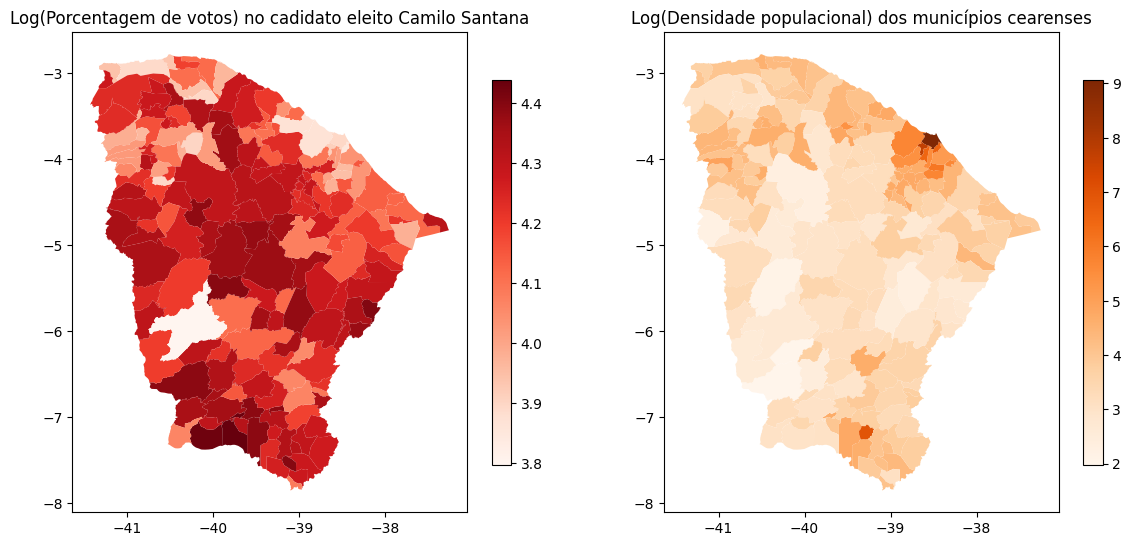

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))
ax1 = votos_camilo_por_municipio.plot(np.log(votos_camilo_por_municipio['porcentagem_votos']), legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Log(Porcentagem de votos) no cadidato eleito Camilo Santana')
ax2 = dados_ibge.plot(np.log(dados_ibge['densidade_populacional']), cmap= 'Oranges', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Log(Densidade populacional) dos municípios cearenses')
plt.show()

### 4.6.2 Indíce de desenvolvimento humano municipal (IDHM)

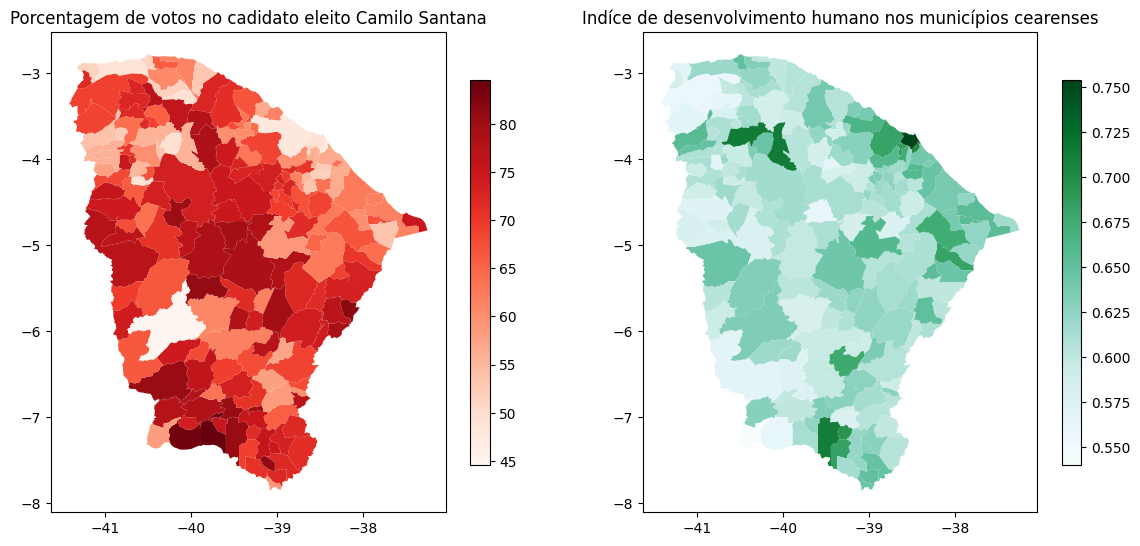

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))
ax1 = votos_camilo_por_municipio.plot('porcentagem_votos', legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Porcentagem de votos no cadidato eleito Camilo Santana')
ax2 = dados_ibge.plot('idhm', cmap= 'BuGn', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Indíce de desenvolvimento humano nos municípios cearenses')
plt.show()

### 4.6.3 PIB *per capita*

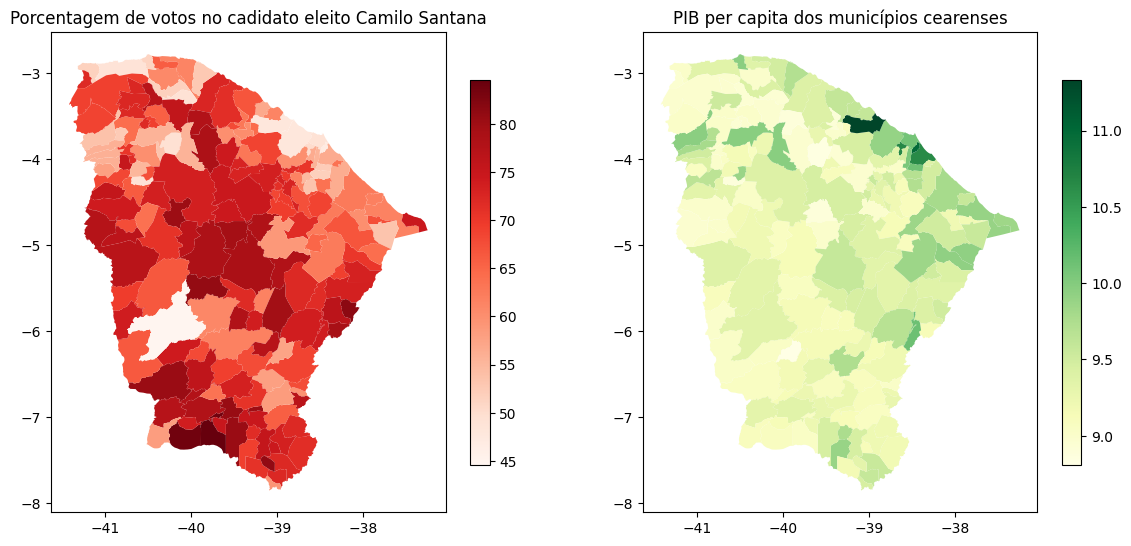

In [74]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))
ax1 = votos_camilo_por_municipio.plot('porcentagem_votos', legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Porcentagem de votos no cadidato eleito Camilo Santana')
ax2 = dados_ibge.plot(np.log(dados_ibge['pib_per_capita']), cmap= 'YlGn', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('PIB per capita dos municípios cearenses')
plt.show()

### 4.6.4 Área urbanizada

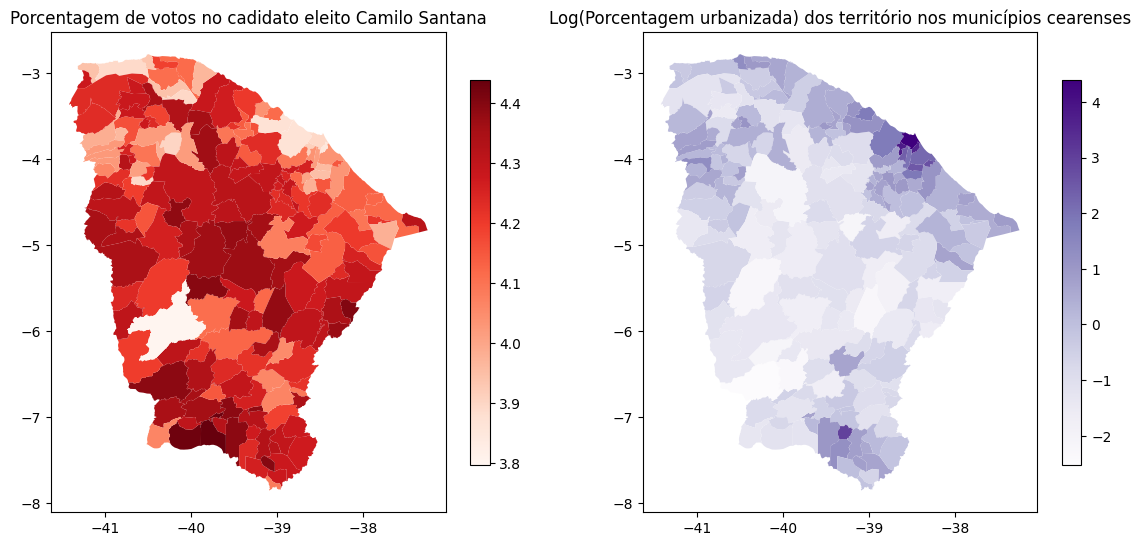

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))
ax1 = votos_camilo_por_municipio.plot(np.log(votos_camilo_por_municipio['porcentagem_votos']), legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Porcentagem de votos no cadidato eleito Camilo Santana')
ax2 = dados_ibge.plot(np.log(dados_ibge['porcentagem_urbana']), cmap= 'Purples', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Log(Porcentagem urbanizada) dos território nos municípios cearenses')
plt.show()

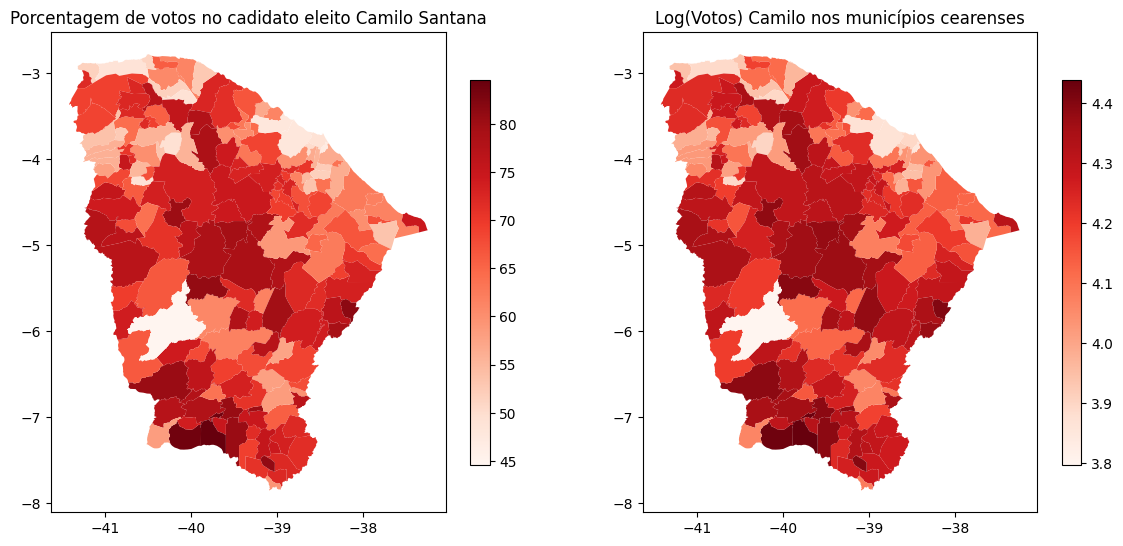

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))
ax1 = votos_camilo_por_municipio.plot('porcentagem_votos', legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Porcentagem de votos no cadidato eleito Camilo Santana')
ax2 = dados_ibge.plot(np.log(votos_camilo_por_municipio['porcentagem_votos']), cmap= 'Reds', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Log(Votos) Camilo nos municípios cearenses')
plt.show()

## 4.7 Análise por intervalo de indicadores socioeconômicos

Há a possibilidade de analisar os votos por grupos, intervalos dos indicadores socioeconômicos do IBGE. Instancia-se um *dataframe* com a quantidade de votos para cada candidato em cada município cearense.

In [ ]:
# Os dados são agrupados por nome do município e candidato e os votos somados. Por último, os indíces são resetados:

votos_candidatos_por_municipio = senador.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()
votos_candidatos_por_municipio.head()

,nm_municipio,nm_votavel,qt_votos
0,ABAIARA,CAMILO SOBREIRA DE SANTANA,4420
1,ABAIARA,ERIKA GONÇALVES AMORIM,18
2,ABAIARA,FRANCISCO CARLOS ALVES DA SILVA,2
3,ABAIARA,KAMILA CARDOSO DE SOUZA RIBEIRO,499
4,ABAIARA,VOTO BRANCO,413


In [ ]:
# Os dados socioeconômicos do IBGE são juntados ao dataframe dos votos:

votos_candidatos_por_municipio = pd.merge(
    left= votos_candidatos_por_municipio, right= dados_ibge,
    how= 'left', left_on= 'nm_municipio', right_on= 'name_muni'
)

# A coluna nome é retirada, pois os dados são redundantes:

votos_candidatos_por_municipio = votos_candidatos_por_municipio.drop('name_muni', axis= 1)
votos_candidatos_por_municipio.head()

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional
0,ABAIARA,CAMILO SOBREIRA DE SANTANA,4420,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
1,ABAIARA,ERIKA GONÇALVES AMORIM,18,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
2,ABAIARA,FRANCISCO CARLOS ALVES DA SILVA,2,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
3,ABAIARA,KAMILA CARDOSO DE SOUZA RIBEIRO,499,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
4,ABAIARA,VOTO BRANCO,413,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17


As funções abaixo serão utilizadas para ajustar os dados para análise:

In [ ]:
def intervalos_ibge(dataframe: pd.DataFrame, nome_coluna: str, nova_coluna: str, bins: list, labels: list):
  """""
  A função 'intervalos_ibge' adiciona ao dataframe com os votos dos candidatos por município uma nova coluna. Tal coluna passa a conter um intervalo 
  pré-determinado determinado indicador do IBGE relacionado ao município em questão.

  * dataframe: dataframe contendo os votos por candidato em cada município.
  * nome_coluna: coluna com a informação que será utilizada para gerar o intervalo.
  * nova_coluna: nome da nova coluna contendo os intervalos dos indicadores do IBGE.
  * bins: lista com os valores que serão usados para formar os intervalos dos indicadores.
  * labels: lista com as labels dos intervalos.
  """""
  dataframe[nova_coluna] = pd.cut(
      dataframe[nome_coluna], bins= bins, labels= labels,
      include_lowest= True, right= False # o valor mais baixo é incluso, enquanto o valor maior não é incluso.
  )

  return dataframe # retorna o dataframe, agora contendo a coluna com os intervalos dos indicadores do IBGE.

def dict_votos_totais(dataframe: pd.DataFrame, coluna_indicador: str):
  """""
  A função dict_votos_totais retorna um dicionário com a quantidade de votos gerais para cada intervalo dos indicadores do IBGE.

  * dataframe: contendo os votos por candidato em cada município, além da coluna com os intervalos dos indicadores.
  * coluna_indicador: nome da coluna contendo os intervalos dos indicadores.
  """""
  valores_totais = dataframe.groupby(coluna_indicador)['qt_votos'].sum()
  valores_totais = dict(valores_totais)
  
  return valores_totais

def dataframe_com_porcentagens(dataframe: pd.DataFrame, dictionary: dict, coluna_indicador: str):
  """""
  A função dataframe_com_porcentagens retorna um dataframe contendo a porcentagem de votos para cada candidato referente a cada intervalo de indicador.
  * dataframe: dataframe com votos dos candidatos por municípios.
  * dictionary: dicionário contendo os votos totais de cada intervalo de indicador do IBGE.
  * coluna_indicador: coluna com o indicador do IBGE que se deseja calcular os valores de porcentagem.
  """""

  # O dataframe é agrupado pela coluna com os indicadores e nome dos candidatos, os votos são somados e ordenados:

  dataframe_intervalos_ibge = dataframe.groupby([coluna_indicador, 'nm_votavel'])['qt_votos'].sum()\
                                       .reset_index().sort_values([coluna_indicador, 'qt_votos'], ascending= [True, False])

  # A porcentagem para cada candidado em cada intervalo do indicador é calculada:

  porcentagem = list()

  for index, row in dataframe_intervalos_ibge.iterrows():
    valor = round((row['qt_votos']/dictionary[row[coluna_indicador]]) * 100, 2)
    porcentagem.append(valor)
  
  # E depois uma nova coluna é adicionada ao dataframe que é retornado:

  dataframe_intervalos_ibge['porcentagem_' + coluna_indicador] = porcentagem # o nome da coluna é obtido a partir da concatenação das strings.

  return dataframe_intervalos_ibge

### 4.7.1 Intervalos populacionais

In [ ]:
# Intervalos:

bins = [0, 100000, 500000, 3000000]

# Labels para os intervalos populacionais:

labels = ['Menos de 100 mil habitantes', '100 mil e menos de 500 mil habitantes', '500 mil habitantes ou mais']

In [ ]:
# Uma nova coluna com os intervalos populacionais é adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe= votos_candidatos_por_municipio,
    nome_coluna= 'populacao',
    nova_coluna= 'populacao_intervalos',
    bins= bins, labels= labels
)
votos_candidatos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos
0,ABAIARA,CAMILO SOBREIRA DE SANTANA,4420,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes
1,ABAIARA,ERIKA GONÇALVES AMORIM,18,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes


In [ ]:
# Os votos totais para cada intervalo populacional são mostrados no dicionário:

votos_por_intervalo_populacional = dict_votos_totais(votos_candidatos_por_municipio, 'populacao_intervalos')
votos_por_intervalo_populacional

{'Menos de 100 mil habitantes': 3146126,
 '100 mil e menos de 500 mil habitantes': 917622,
 '500 mil habitantes ou mais': 1559702}

In [ ]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_populacionais = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_populacional, 'populacao_intervalos'
)
votos_intervalos_populacionais.head()

,populacao_intervalos,nm_votavel,qt_votos,porcentagem_populacao_intervalos
0,Menos de 100 mil habitantes,CAMILO SOBREIRA DE SANTANA,2067306,65.71
3,Menos de 100 mil habitantes,KAMILA CARDOSO DE SOUZA RIBEIRO,548025,17.42
5,Menos de 100 mil habitantes,VOTO NULO,252005,8.01
4,Menos de 100 mil habitantes,VOTO BRANCO,161536,5.13
1,Menos de 100 mil habitantes,ERIKA GONÇALVES AMORIM,116365,3.70


In [ ]:
fig = px.bar(
    data_frame= votos_intervalos_populacionais,
    y= 'populacao_intervalos',
    x= 'porcentagem_populacao_intervalos',
    color= 'nm_votavel',
    title= 'Porcentagem de votos dos candidatos por intervalo populacional dos municípios cearenses'
)
fig.update_layout(
    yaxis_title= '', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos',
    yaxis= dict(autorange= 'reversed'), title= dict(x= 0.5)
)
fig.show()

* A porcentagem de votos entre VOTO BRANCO, VOTO NULO, na candidata Erika Gonçalves e no candidato Francisco Carlos pouco varia entre os intervalos referentes as populações.
* O candidato Camilo Santana apresentou menor desempenho eleitoral em cidades com maior população, apesar de ter aproximadamente 50% dos votos no intervalo das cidades com mais de 500 mil habitantes.
* Em nenhum cenário a candidata Kamila Cardoso teve mais votos que o candidato eleito, mas observa-se um melhor desempenho no cenário das cidades com maior população.

### 4.7.2 Intervalos de indíce de desenvolvimento humano

In [ ]:
# Intervalos:

bins = [0, 0.55, 0.7, 0.8]

# Labels para os intervalos de IDH municipal:

labels = ['IDH baixo', 'IDH médio', 'IDH alto']

In [ ]:
# Uma nova coluna com os intervalos de IDHM é adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe= votos_candidatos_por_municipio,
    nome_coluna= 'idhm',
    nova_coluna= 'idhm_intervalos',
    bins= bins, labels= labels
)
votos_candidatos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos,idhm_intervalos
0,ABAIARA,CAMILO SOBREIRA DE SANTANA,4420,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio
1,ABAIARA,ERIKA GONÇALVES AMORIM,18,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio


In [ ]:
# Os votos totais para cada intervalo de IDHM são mostrados no dicionário:

votos_por_intervalo_idhm = dict_votos_totais(votos_candidatos_por_municipio, 'idhm_intervalos')
votos_por_intervalo_idhm

{'IDH baixo': 11019, 'IDH médio': 3804659, 'IDH alto': 1807772}

In [ ]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_idhm = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_idhm, 'idhm_intervalos'
)
votos_intervalos_idhm.head()

,idhm_intervalos,nm_votavel,qt_votos,porcentagem_idhm_intervalos
0,IDH baixo,CAMILO SOBREIRA DE SANTANA,6417,58.24
1,IDH baixo,ERIKA GONÇALVES AMORIM,2798,25.39
5,IDH baixo,VOTO NULO,806,7.31
3,IDH baixo,KAMILA CARDOSO DE SOUZA RIBEIRO,679,6.16
4,IDH baixo,VOTO BRANCO,318,2.89


In [ ]:
fig = px.bar(
    data_frame= votos_intervalos_idhm,
    y= 'idhm_intervalos',
    x= 'porcentagem_idhm_intervalos',
    color= 'nm_votavel',
    title= 'Porcentagem de votos dos candidatos por intervalo de IDH municipal dos municípios cearenses'
)
fig.update_layout(
    yaxis_title= '', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos',
    yaxis= dict(autorange= 'reversed'), title= dict(x= 0.5)
)
fig.show()

* O intervalo IDH baixo é referente unicamente ao município de Salitre, o que pode ser visto abaixo:

In [ ]:
votos_candidatos_por_municipio.query('idhm_intervalos == "IDH baixo"')['nm_municipio'].unique()

array(['SALITRE'], dtype=object)

* E nesse município em específico, a candidata Erika Gonçalves teve um desempenho eleitoral significativo.
* O melhor desempenho da candidata Kamila Cardoso aconteceu no intervalo de IDH alto.

### 4.7.3 Anáise por PIB *per capita*

In [ ]:
# Intervalos:

bins = [0, 10000, 20000, 90000]

# Labels para os intervalos de PIB per capita:

labels = ['Menos de R$ 10000', 'Entre R$ 10000 - 19999,99', 'R$ 20000 ou mais']

In [ ]:
# Uma nova coluna com os intervalos de PIB per capita é adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe= votos_candidatos_por_municipio,
    nome_coluna= 'pib_per_capita',
    nova_coluna= 'pib_intervalos',
    bins= bins, labels= labels
)
votos_candidatos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos,idhm_intervalos,pib_intervalos
0,ABAIARA,CAMILO SOBREIRA DE SANTANA,4420,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000
1,ABAIARA,ERIKA GONÇALVES AMORIM,18,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000


In [ ]:
# Os votos totais para cada intervalo de PIB per capita são mostrados no dicionário:

votos_por_intervalo_pib = dict_votos_totais(votos_candidatos_por_municipio, 'pib_intervalos')
votos_por_intervalo_pib

{'Menos de R$ 10000': 1131888,
 'Entre R$ 10000 - 19999,99': 2321911,
 'R$ 20000 ou mais': 2169651}

In [ ]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_pib = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_pib, 'pib_intervalos'
)
votos_intervalos_pib.head()

,pib_intervalos,nm_votavel,qt_votos,porcentagem_pib_intervalos
0,Menos de R$ 10000,CAMILO SOBREIRA DE SANTANA,781105,69.01
3,Menos de R$ 10000,KAMILA CARDOSO DE SOUZA RIBEIRO,158103,13.97
5,Menos de R$ 10000,VOTO NULO,89034,7.87
1,Menos de R$ 10000,ERIKA GONÇALVES AMORIM,51933,4.59
4,Menos de R$ 10000,VOTO BRANCO,51426,4.54


In [ ]:
fig = px.bar(
    data_frame= votos_intervalos_pib,
    y= 'pib_intervalos',
    x= 'porcentagem_pib_intervalos',
    color= 'nm_votavel',
    title= 'Porcentagem de votos dos candidatos por intervalo de PIB per capita dos municípios cearenses'
)
fig.update_layout(
    yaxis_title= '', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos',
    yaxis= dict(autorange= 'reversed'), title= dict(x= 0.5)
)
fig.show()

* Porcentagem dos votos para VOTO BRANCO, VOTO NULO e da candidata Erika Gonçalvos são próximos para todos os intervalos do PIB *per capita*.
* A porcentagem de votos do candidato eleito Camilo Santana diminui nos intervalos de maior PIB *per capita*. Apesar disso, no intervalo de maior PIB o candidato eleito obteve cerca de 50% dos votos.
* O desempenho eleitoral da candidata Kamila Cardoso cresceu nos intervalos com maior PIB *per capita*.

### 4.7.4 Análise por intervalo de território urbanizado

In [ ]:
# Intervalos:

bins= [0, 10, 40, 90]

# Labels para os intervalos de território urbanizado:

labels= ['Menos de 10%', 'Entre 10 - 39,99%', '40% ou mais']

In [ ]:
# Uma nova coluna com os intervalos de território urbanizado é adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe= votos_candidatos_por_municipio,
    nome_coluna= 'porcentagem_urbana',
    nova_coluna= 'urbana_intervalos',
    bins= bins, labels= labels
)
votos_candidatos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos,idhm_intervalos,pib_intervalos,urbana_intervalos
0,ABAIARA,CAMILO SOBREIRA DE SANTANA,4420,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000,Menos de 10%
1,ABAIARA,ERIKA GONÇALVES AMORIM,18,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000,Menos de 10%


In [ ]:
# Os votos totais para cada intervalo de território urbanizado são mostrados no dicionário:

votos_por_intervalo_urbana = dict_votos_totais(votos_candidatos_por_municipio, 'urbana_intervalos')
votos_por_intervalo_urbana

{'Menos de 10%': 3608699, 'Entre 10 - 39,99%': 306413, '40% ou mais': 1708338}

In [ ]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_urbana = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_urbana, 'urbana_intervalos'
)
votos_intervalos_urbana.head()

,urbana_intervalos,nm_votavel,qt_votos,porcentagem_urbana_intervalos
0,Menos de 10%,CAMILO SOBREIRA DE SANTANA,2355079,65.26
3,Menos de 10%,KAMILA CARDOSO DE SOUZA RIBEIRO,630111,17.46
5,Menos de 10%,VOTO NULO,288571,8.00
4,Menos de 10%,VOTO BRANCO,190792,5.29
1,Menos de 10%,ERIKA GONÇALVES AMORIM,142819,3.96


In [ ]:
fig = px.bar(
    data_frame= votos_intervalos_urbana,
    y= 'urbana_intervalos',
    x= 'porcentagem_urbana_intervalos',
    color= 'nm_votavel',
    title= 'Porcentagem de votos dos candidatos por intervalo de território urbanizado dos municípios cearenses'
)
fig.update_layout(
    yaxis_title= '', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos',
    yaxis= dict(autorange= 'reversed'), title= dict(x= 0.5)
)
fig.show()

* Kamila Cardoso apresentou acréscimo na porcentagem de votos nos intervalos com território mais urbanizado.
* Já o candidato eleito Camilo Santana apresentou descréscimo na porcentagem de votos nos intervalos com território mais urbanizado. Porém, no intervalo mais urbanizado ainda obteve cerca de 50% dos votos.